# Reporte de práctica 6: Modelos lineales con scipy.stats

En esta práctica tratamos de buscar al menos dos modelos lineales en los datos del cine.
Iniciar los datos

## Cargar datos de csv

Queremos probar si la categoría eligieron para su clip, está relacionado de alguna forma con el país de procedencia y por año de participación.

Primero importamos el archivo que está en GitHub que tiene información limpia de prácticas pasadas.

In [1]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from pandas.compat import u

cine = pd.read_csv('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/old/datosLimpiosCine2.csv', sep='\\')
print(len(cine))
cine = cine.dropna()
print(len(cine))

print(cine.columns)

2735
2277
Index([u'Anio', u'Categoria', u'Pais', u'Genero', u'ComoSeEntero',
       u'ReferenciaCelular'],
      dtype='object')


Para evitar errores de cálculos, usando la función dropna() retiramos todos los registros que tengan algún campo vacío y nos deshacemos de 458 registros que no tienen género o tipo de celular y nos quedamos con 2277 registros válidos.

## Categorización


Como tenemos muchas cadenas de texto en nuestros datos, es importante hacer categorización ya que hacemos conteos de la información que tenemos disponible y así poder hacer cálculos estadísticos.
Categorías por país

### Categorías por país


Aplicamos una categorización por país, pero se removieron los datos que involucran a México y Colombia que son los países anfitriones del concurso y por ende son los que nos sesgan la información, entonces esta información será relevante a los países extranjeros que participan.

In [2]:
paises = cine.Pais.unique()

listaPaises = []
for country in paises:
    listaPaises.append([country,cine[(cine['Pais']==country) & (cine['Anio']==2015)].count()['Anio'],cine[(cine['Pais']==country) & (cine['Anio']==2016)].count()['Anio'],cine[(cine['Pais']==country) & (cine['Anio']==2017)].count()['Anio'],cine[(cine['Pais']==country) & (cine['Anio']==2018)].count()['Anio'],cine[cine['Pais']==country].count()['Anio']])
#print(listaPaises)
listaPaises.pop(0)
listaPaises.pop(1)

dfpais = pd.DataFrame(data=listaPaises)
dfpais.columns = ['Pais', '2015', '2016', '2017', '2018', 'Total']
print(dfpais)

                    Pais  2015  2016  2017  2018  Total
0                 España     7     8     1     5     21
1                Ecuador     2     3     0     0      5
2                Francia     2     1     0     0      3
3              Venezuela     3     1     1     0      5
4              Argentina     1     3     3     1      8
5                   Perú     1     0     0     0      1
6         Estados Unidos     3     3     3     2     11
7                 Brasil     2     1     0     0      3
8                   Cuba     1     0     0     0      1
9               Alemania     0     1     0     0      1
10         Internacional     0     5    11     0     16
11             Marruecos     0     1     0     0      1
12               Uruguay     0     1     0     0      1
13  Republica Dominicana     0     1     0     0      1
14                Canadá     0     1     0     0      1
15            Afganistán     0     0    16     0     16
16               Comoras     0     0     1     0

Al aplicar pruebas de normalidad a los datos, podemos observar que no está presente la normalidad.

(0.5631282329559326, 6.444122037201072e-13, 0.05, 'no normal')
(0.5631282329559326, 6.444122037201072e-13, 0.01, 'no normal')


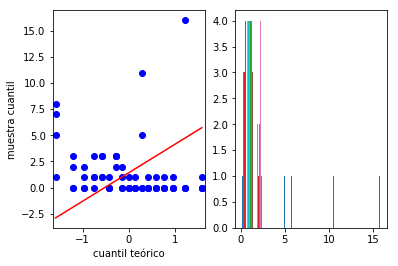

In [8]:
f, ax = plt.subplots(1, 2)
dfpais2=dfpais[['2015','2016','2017','2018']].copy()
qqplot(dfpais2, line='s', ax = ax[0],xlabel=u"cuantil teórico",ylabel="muestra cuantil")
ax[1] = plt.hist(dfpais2)
for a in [0.05, 0.01]:
    s, p = shapiro(dfpais2)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

También categorizamos la Categoría del corto, y se clasificó por año.

In [9]:
categorias = cine.Categoria.unique()
listaCategoria = []
for cat in categorias:
    listaCategoria.append([cat,cine[(cine['Categoria']==cat) & (cine['Anio']==2015) & (cine['Pais']!='Colombia')& (cine['Pais']!='México')].count()['Anio'],cine[(cine['Categoria']==cat) & (cine['Anio']==2016)& (cine['Pais']!='Colombia')& (cine['Pais']!='México')].count()['Anio'],cine[(cine['Categoria']==cat) & (cine['Anio']==2017)& (cine['Pais']!='Colombia')& (cine['Pais']!='México')].count()['Anio'],cine[(cine['Categoria']==cat) & (cine['Anio']==2018)& (cine['Pais']!='Colombia')& (cine['Pais']!='México')].count()['Anio'],cine[(cine['Categoria']==cat) & (cine['Pais']!='Colombia')& (cine['Pais']!='México')].count()['Anio']])

dfcat = pd.DataFrame(data=listaCategoria)
dfcat.columns = ['Categoria', '2015', '2016', '2017', '2018', 'Total']
print(dfcat)


     Categoria  2015  2016  2017  2018  Total
0   Aficionado    13    16    11     3     43
1  Profesional     8     7     7     3     25
2     Infantil     1     1     0     0      2
3      Juvenil     0     4     9     0     13
4      SmarTIC     0     2     9     2     13


TypeError: 'unicode' object is not callable

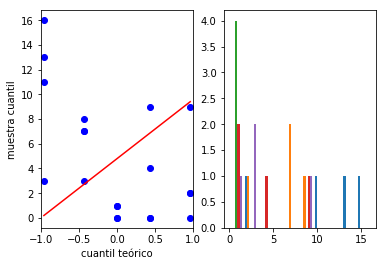

In [37]:
f, ax = plt.subplots(1, 2)
dfcat2=dfcat[['2015','2016','2017','2018']].copy()
qqplot(dfcat2, line='s', ax = ax[0],xlabel=u"cuantil teórico",ylabel="muestra cuantil")
ax[1] = plt.hist(dfcat2)
plt.xlabel("cuantil teórico",ax = ax[1])
plt.ylabel("muestra cuantil",ax = ax[1])
for a in [0.05, 0.01]:
    s, p = shapiro(dfcat2)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

Podemos observar que los datos de la categoría tampoco estar normales.

## Modelo lineal

Empezamos con la modelación lineal, suponiendo que la categoría es una consecuencia del país de los creadores del clip. Se probó la relación lineal por año, y también la relación total.

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2015']
x = dfpais['2015'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.9545 x + -1.4636
('error', 0.8974251505426212)
('valor p', 0.11757517937281314)
pendiente no significativo
('R^2', 0.6125761993108931)


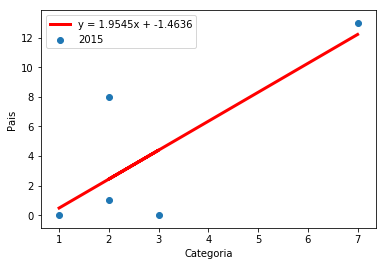

In [13]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2016']
x = dfpais['2016'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.9512 x + -0.2439
('error', 0.4633076470424925)
('valor p', 0.024454336793225805)
pendiente significativo
('R^2', 0.8553291012362179)


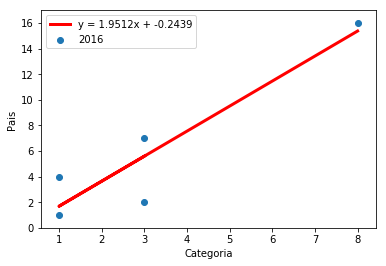

In [15]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [16]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2017']
x = dfpais['2017'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.8333 x + 5.3667
('error', 1.7099924193031015)
('valor p', 0.36223895879468526)
pendiente no significativo
('R^2', 0.277014652014652)


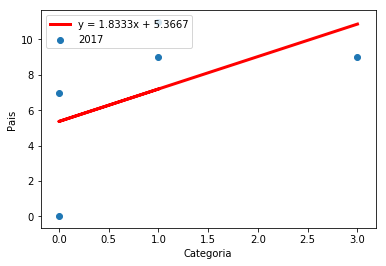

In [17]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [18]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2018']
x = dfpais['2018'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 0.3936 x + 1.1277
('error', 0.3338798899250046)
('valor p', 0.32341836282824227)
pendiente no significativo
('R^2', 0.316604995374653)


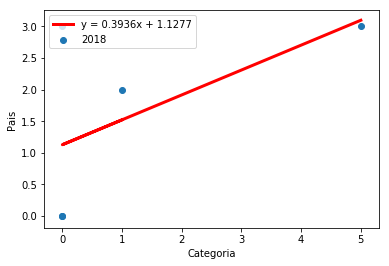

In [19]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [20]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['Total']
x = dfpais['Total'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.8778 x + 3.4261
('error', 0.5999372539983482)
('valor p', 0.052063036755892314)
pendiente no significativo
('R^2', 0.7655753541791265)


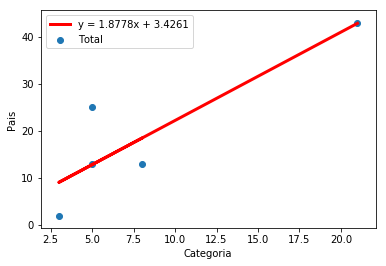

In [21]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

La pendiente fue no significativa a excepción del año 2016, esto fue determinante para predecir el total. Entonces como no hubo una fuerte significación, se determina lo opuesto, es decir, la categoría no está relacionada con el país de procedencia.

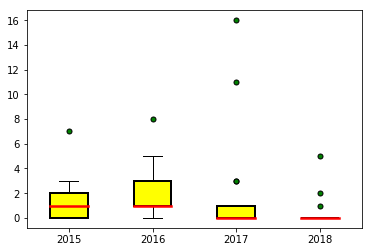

In [22]:
bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='yellow')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='red')
plt.boxplot([dfpais['2015'], dfpais['2016'],dfpais['2017'],dfpais['2018']], labels=["2015", "2016", "2017", "2018"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()

En esta gráfica podemos determinar que en 2017 fue el año en el que más gente extranjera de un solo país participó en el concurso.

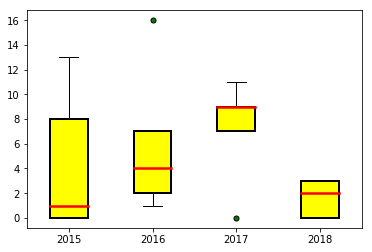

In [23]:
bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='yellow')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='red')
plt.boxplot([dfcat['2015'], dfcat['2016'],dfcat['2017'],dfcat['2018']], labels=["2015", "2016", "2017", "2018"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()

En esta gráfica podemos determinar que en 2017 fue el año en el que hubo más distribución de participantes entre todas las categorías

## Conclusiones

Fue interesante aprender a usar la librería matplotlib, tuve menos problemas para trabajar con esta librería que con la de Plotly. También logré hacer categorización de los datos para poder tratarlos de forma estadística.

De los datos, pudimos determinar que en los años 2015, 2017, 2018 la categoría elegida no era significativa según el país de procedencia, pero en 2016 ocurrió que si era significativo. Al hacer los cálculos de todos los años juntos perdió la significación. En el año 2017 hubo más participación extranjera de un solo país y además donde se participó con mayor uniformidad en las categorías disponibles.

--05 de junio 2019-- Luis Angel Gutiérrez Rodríguez 1484412